In [3]:
%pylab inline
from IPython.display import HTML

Populating the interactive namespace from numpy and matplotlib


In [19]:
# defining our own kronecker delta 
kronecker_delta = lambda i,j: 1 if i == j else 0
potential = lambda x: -1 if absolute(x) < 20 else 0

Next we generate the lattice for the simulation. For now we consider 2000 lattice points.

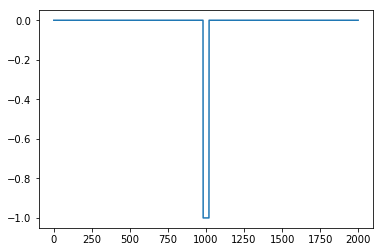

In [20]:
delta = 1 # The spacing between neighboring lattice points
L = 1000 # The ends of the lattice
length = 10
momentum = 1
lattice = arange(-L,L,delta)
v = vectorize(potential)
plot(v(lattice))

In [23]:
hamiltonian = np.zeros((lattice.shape[0],lattice.shape[0]))
for row in range(lattice.shape[0]):
    for col in range(lattice.shape[0]):
        hamiltonian[row,col] = (kronecker_delta(col+1, row)\
                                + kronecker_delta(col-1, row)\
                                - 2*kronecker_delta(col,row))/-(delta)**2\
                                + potential(row)*kronecker_delta(col,row)
hamiltonian

array([[ 1., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  1., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  1., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])

Now that we've computed the hamiltonian matrix, let's diagonalize it

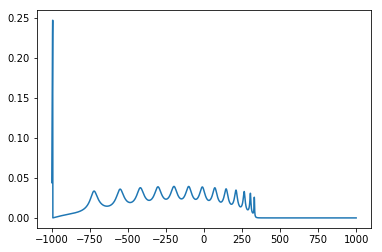

In [26]:
eigenvalues, eigenvectors = linalg.eigh(hamiltonian)
plot(lattice,absolute(eigenvectors[0]))

In [60]:
# eigenvectors[0].shape
wavefunction.shape

(2000,)

Let's define the initial state of our system now. 

1.0


array([  5.05473356e-220 -7.43209685e-220j,
         2.44114938e-219 +6.46172756e-221j,
         3.43234625e-219 +5.67016730e-219j, ...,
        -7.90882423e-219 -1.61383394e-218j,
         3.43234625e-219 -5.67016730e-219j,
         2.44114938e-219 -6.46172756e-221j])

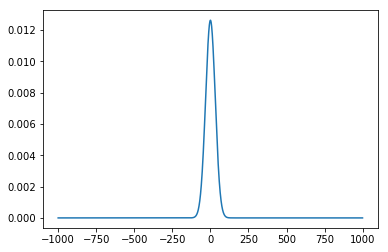

In [56]:
wavefunction = (1/sqrt(2)*length)*exp(-((lattice)**2)/2000)*exp(1j*momentum*lattice)
normalize = sum(absolute(wavefunction))*delta
wavefunction /= normalize
print(sum(absolute(wavefunction))*delta)
plot(lattice,absolute(wavefunction))
wavefunction

Now we decompose the state into the projections on the basis vectors

In [48]:
coeff = empty_like(eigenvalues)
for index in range(eigenvalues.shape[0]):
    coeff[index] = vdot(eigenvectors[index],wavefunction)

C:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


Now that we know the wavefunction as a linear combination of basis vectors, the time evolution of the complete wavefuction is just the linear combination of the time evolutions of the basis states. Lets do this for 10 time steps.

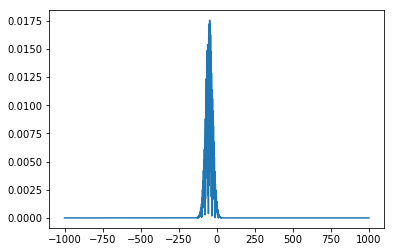

In [40]:
func = zeros_like(eigenvalues,dtype=complex128)
for index in range(eigenvalues.shape[0]):
        func += coeff[index]*eigenvectors[index]
plot(lattice,absolute(func))

In [41]:
time_steps = arange(0,200,2)
evolution = []
for time in time_steps:
    wavefunc = zeros_like(eigenvalues,dtype=complex128)
    for index in range(eigenvalues.shape[0]):
        wavefunc += coeff[index]*eigenvectors[index]*exp(-1j*eigenvalues[index]*time)
    evolution.append(wavefunc)

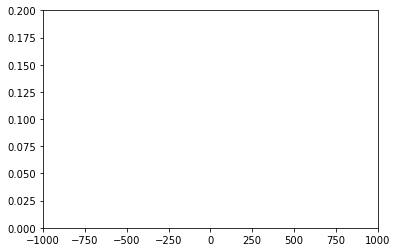

In [44]:
fig = plt.figure()
ax = plt.axes(xlim=(-L, L), ylim=(0, 0.2))
line, = ax.plot([], [], lw=2)
def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(lattice,absolute(evolution[i]))
    return line,

In [45]:
from matplotlib import animation
anim = animation.FuncAnimation(fig,animate,init_func=init,frames=100,interval=50,blit=True)
HTML(anim.to_html5_video())